#  Books Recommendation using KNN (user-item feedback)

1. content-based filtering

2. collaborative filtering(also known as “personality based filtering”)

In [5]:
import pandas as pd  # Load and manipulate data, provides data structure in form of data
import numpy as np   
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
data = pd.read_csv('BX-Book-Ratings.csv', sep = ';',header=0,names=["user","isbn","rating"],error_bad_lines=False)
data.head(5)

,user,isbn,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [7]:
data.dtypes

user       int64
isbn      object
rating     int64
dtype: object

In [8]:
books_rating = pd.read_csv('BX-Books.csv', sep = ';',usecols=[0,1,2],index_col=0,names=["isbn","title","author"],error_bad_lines=False)
books_rating.head()

,title,author
isbn,,
ISBN,Book-Title,Book-Author
0195153448,Classical Mythology,Mark P. O. Morford
0002005018,Clara Callan,Richard Bruce Wright
0060973129,Decision in Normandy,Carlo D'Este
0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata


In [9]:
books_rating.isnull().sum()

title     0
author    1
dtype: int64

In [10]:
df = pd.merge(data,books_rating,on = 'isbn')
df.head()

,user,isbn,rating,title,author
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose


# EDA

In [16]:
df.user.values

array([276725,   2313,   6543, ..., 276690, 276704, 276704], dtype=int64)

[]

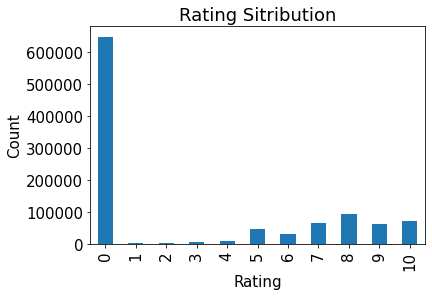

In [18]:
plt.rc("font",size=15)
df.rating.value_counts(sort = False).plot(kind = 'bar')
plt.title("Rating Sitribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.plot()

--> WE can observe that the rating is from 0-10 

--> The rating for 0 is heigher  

In [20]:
df.rating.unique()

array([ 0,  5,  9,  8,  6,  7,  4, 10,  3,  2,  1], dtype=int64)

In [32]:
# divide ratings into two parts 
# 1. rating without 0
# 2. rating with 0

#rating_explict = df[df.rating!= 0]
#rating_implict = df[df.rating == 0]

In [31]:
# identifying the users who are not given zero rating
#user_exp_ratings = df[df.user.isin(rating_explict.user)]

# identifying the users who are not given zero rating
#user_imp_ratings = df[df.user.isin(rating_implict.user)]

In [30]:
#sns.countplot(data =rating_explict,x='rating' )
#plt.show()

In [28]:
#Rating count for each book
combine_book_rating = df.dropna(axis = 0,subset=['title']) #first drop all nan val if any
bookRatingCount = (combine_book_rating.groupby(by=['title'])['rating'].count().reset_index().rename(columns = {'rating':'TotRatingCount'})[['title','TotRatingCount']])
#group by title considering rating columns count
#reset the index as we want
bookRatingCount.head()

,title,TotRatingCount
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [29]:
df.rating.unique()

array([ 0,  5,  9,  8,  6,  7,  4, 10,  3,  2,  1], dtype=int64)

In [26]:
#we will require total ratingcount further hence merge it with 'df'
rating_with_totRating = combine_book_rating.merge(bookRatingCount,left_on = 'title',right_on = 'title',how = 'left')
rating_with_totRating.head()

,user,isbn,rating,title,author,TotRatingCount
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,60
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,60
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,60
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,60
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,60


In [31]:
pd.set_option('display.float_format',lambda x:'%.3f'%x)
print(bookRatingCount['TotRatingCount'].describe())

count   241090.000
mean         4.277
std         16.738
min          1.000
25%          1.000
50%          1.000
75%          3.000
max       2502.000
Name: TotRatingCount, dtype: float64


In [34]:
# filter the rating count which is greater than 50
rating_popular_book = rating_with_totRating.query('TotRatingCount >=50')
rating_popular_book.head()

,user,isbn,rating,title,author,TotRatingCount
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,60
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,60
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,60
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,60
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,60


In [35]:
rating_popular_book.shape

(288740, 6)

In [36]:
# Creating pivot table
book_features_df =rating_popular_book.pivot_table(index = 'title',columns = 'user',values ='rating').fillna(0)

In [38]:
book_features_df.head(7)

user,8,9,14,16,17,19,23,26,32,39,...,278820,278824,278828,278832,278836,278843,278844,278846,278851,278854
title,,,,,,,,,,,,,,,,,,,,,
10 Lb. Penalty,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
16 Lighthouse Road,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1984,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1st to Die: A Novel,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2010: Odyssey Two,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
204 Rosewood Lane,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2061: Odyssey Three,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [42]:
# Theory of cosine similarity 15m

#  Collaborative filtering
 user similarity

In [39]:
#conver the matrix into arrays matrix
from scipy.sparse import csr_matrix
book_features_df_matrix = csr_matrix(book_features_df.values)

from sklearn.neighbors import NearestNeighbors #unsuppervised ml 
 
model_knn = NearestNeighbors(metric = 'cosine' ,algorithm = 'brute')
model_knn.fit(book_features_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [40]:
book_features_df_matrix.shape

(2444, 47994)

In [43]:
query_index = np.random.choice(book_features_df.shape[0])#select one randome record
print(query_index)
distances,indices = model_knn.kneighbors(book_features_df.iloc[query_index,:].values.reshape(1,-1),n_neighbors=6)

139


In [48]:
for i in range(0,len(distances.flatten())):
    if i==0:
        print("Recommendations for {0}: \n" .format(book_features_df.index[query_index]))
    else:
        print("{0}:{1}, with distance of {2}:".format(i,book_features_df.index[indices.flatten()[i]],distances.flatten()[i]))

Recommendations for Amsterdam : A Novel: 

1:Blindness (Harvest Book), with distance of 0.8993854542246209:
2:Mixed Blessings, with distance of 0.9018691234606024:
3:The Charm School, with distance of 0.9019180205600379:
4:Eva Luna, with distance of 0.9032375872417026:
5:Guns, Germs, and Steel: The Fates of Human Societies, with distance of 0.9046764157024241:
